# MP2 - Sentimental Analysis
By: Thinakone Louangdy



I use Kaggle to train my BERT model, while it can be done in Google Collab too but I ran out of my GPU limit usage here. To run my BERT model, you need to c just take a look at the result.onnect to GPU and have at least at leasest least 40GB of the available disk in your drive because we will save the model in some certain checkpoint. Otherwise, just observe the output of the training.



In [ ]:
!pip install contractions
!pip install datasets
!pip install -U accelerate
!pip install -U transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 2.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.26.1
    Uninstalling accelerate-0.26.1:
      Successfully uninstalled accelerate-0.26.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.1/131.1 kB 1.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 33.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: transformers
    Found existing installation: transformers 4.37.0
    Uninstalling transformers-4.37.0:
      Successfully uninstalled transformers-4.37.0


In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import contractions
import subprocess
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
#adjust data path as where you upload it
df = pd.read_csv("/kaggle/input/ml-mp2-dataset/Sentiment140.tenPercent.sample.tweets.tsv", sep="\t")
df.head()

,sentiment_label,tweet_text
0,4,"@elephantbird Hey dear, Happy Friday to You A..."
1,4,Ughhh layin downnnn Waiting for zeina to co...
2,0,"@greeniebach I reckon he'll play, even if he's..."
3,0,@vaLewee I know! Saw it on the news!
4,0,very sad that http://www.fabchannel.com/ has c...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   sentiment_label  160000 non-null  int64 
 1   tweet_text       160000 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


In [ ]:
df['sentiment_label'].value_counts()

sentiment_label
4    80000
0    80000
Name: count, dtype: int64

<Axes: xlabel='sentiment_label', ylabel='count'>

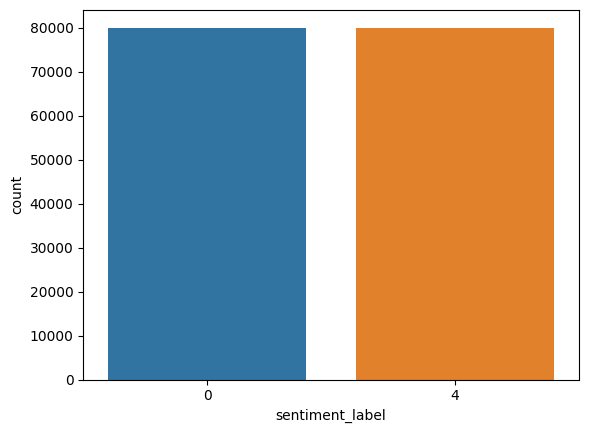

In [ ]:
sns.countplot(x='sentiment_label', data=df)

### Preprocessing

### Download Required Packages

In [ ]:
nltk.download('punkt')  # For tokenization
nltk.download('stopwords')  # For stop words
# nltk.download('wordnet')  # For lemmatization

# If you're using Kaggle too, uncomment this line below, otherwise, continue
# # Download and unzip wordnet
# try:
#     nltk.data.find('wordnet.zip')
# except:
#     nltk.download('wordnet', download_dir='/kaggle/working/')
#     command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
#     subprocess.run(command.split())
#     nltk.data.path.append('/kaggle/working/')

# # Now you can import the NLTK resources as usual
# from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /kaggle/working/...
Archive:  /kaggle/working/corpora/wordnet.zip
   creating: /kaggle/working/corpora/wordnet/
  inflating: /kaggle/working/corpora/wordnet/lexnames  
  inflating: /kaggle/working/corpora/wordnet/data.verb  
  inflating: /kaggle/working/corpora/wordnet/index.adv  
  inflating: /kaggle/working/corpora/wordnet/adv.exc  
  inflating: /kaggle/working/corpora/wordnet/index.verb  
  inflating: /kaggle/working/corpora/wordnet/cntlist.rev  
  inflating: /kaggle/working/corpora/wordnet/data.adj  
  inflating: /kaggle/working/corpora/wordnet/index.adj  
  inflating: /kaggle/working/corpora/wordnet/LICENSE  
  inflating: /kaggle/working/corpora/wordnet/citation.bib  
  inflating: /kaggle/working/corpor

### Text Preprocessing

In [ ]:
def preprocess_text(tweet):
    #Fix text first (Transform to full form). EX: I'll --> I will
    text = contractions.fix(tweet)

    # Username removal
    text = re.sub(r'\@\w+', '', text)

    # URL/Link removal
    text = re.sub(r'https?:\/\/\S*www\S+', ' ', text)

    # Special character removal
    text = re.sub(r'[@.,\-!\%\'$/?;()'']+', ' ', text)

    # Remove punctuations and numbers
    text = re.sub('[^a-zA-Z@]', ' ', text)

    # Removing multiple spaces
    text = re.sub(r'\s+', ' ', text)

    # Tokenization
    tokens = nltk.word_tokenize(text)

    # Lowercasing, stop word removal, lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w.lower()) for w in tokens if w.lower() not in stopwords.words('english')]
    return ' '.join(words)

In [ ]:
df['tweet_text'] = df['tweet_text'].apply(preprocess_text)
df.head(10)

,sentiment_label,tweet_text
0,4,hey dear happy friday already rice bowl lunch
1,4,ughhh layin downnnn waiting zeina cook breakfast
2,0,reckon play even know nothing without
3,0,know saw news
4,0,sad closed one web service used year
5,0,sings remember alwaysss hear radio never catch...
6,4,god side anything possible
7,0,stupid
8,0,delved back gut expression engine flexible cm ...
9,0,awww take


In [ ]:
X = df['tweet_text']
y = df['sentiment_label']
y = np.array(list(map(lambda x: 1 if x == 4 else 0, y))) # Convert Labels to Binary format (0 and 1)

### Logistic Regression

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Convert text to numerical
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
X_train.shape, X_test.shape

((128000, 57628), (32000, 57628))

In [ ]:
lr_classification = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', max_iter=200)
lr_classification.fit(X_train, y_train)

y_pred = lr_classification.predict(X_test)

print("Machine Learning Model: Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Machine Learning Model: Logistic Regression
Accuracy: 0.76278125
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.74      0.76     16002
           1       0.75      0.78      0.77     15998

    accuracy                           0.76     32000
   macro avg       0.76      0.76      0.76     32000
weighted avg       0.76      0.76      0.76     32000



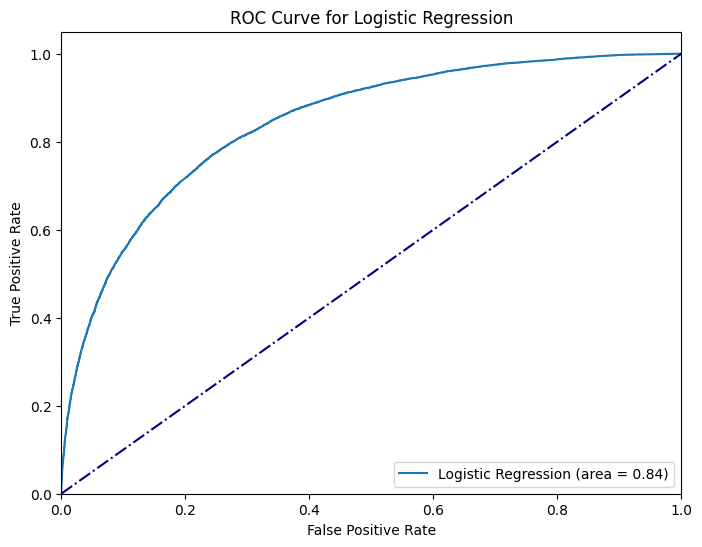

In [ ]:
from sklearn.metrics import roc_curve, auc

y_prob_lr = lr_classification.predict_proba(X_test)[:, 1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(8, 6))

# Logistic Regression Plot
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (area = %0.2f)' % roc_auc_lr)

plt.plot([0, 1], [0, 1], color='navy', linestyle='dashdot')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

### BERT



*   To execute this part you have to turn on T4 GPU Runtime in collab and have at least 50GB of drive space. Otherwise, the results on collab here is



In [ ]:
import tensorflow as tf
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments, EvalPrediction
from torch.utils.data import Dataset
import accelerate

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y.astype(int), test_size=0.20, random_state=42)

In [ ]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    acc = accuracy_score(labels, preds)
    return {'accuracy': acc}

# Define a PyTorch dataset
class SentimentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)


# Load BERT Tokenizer and Model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True, max_length=512)

# Convert to dataset
train_dataset = SentimentDataset(train_encodings, y_train.tolist())
test_dataset = SentimentDataset(test_encodings, y_test.tolist())

# Define training arguments
training_args = TrainingArguments(
    output_dir='/kaggle/tmp/results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='/kaggle/tmp/logs',
    logging_steps=10,
    save_steps=5000,  # Save the model every 5000 steps
)

num_labels = 2  # Only 0 and 1

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Step,Training Loss
10,0.781100
20,0.729200
30,0.731700
40,0.710300
50,0.700000
60,0.691100
70,0.686900
80,0.664100
90,0.666500
100,0.688000


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


TrainOutput(global_step=12000, training_loss=0.3862840662399928, metrics={'train_runtime': 3126.8568, 'train_samples_per_second': 122.807, 'train_steps_per_second': 3.838, 'total_flos': 1.006399786752e+16, 'train_loss': 0.3862840662399928, 'epoch': 3.0})

In [ ]:
eval_results = trainer.evaluate()

print(eval_results)

{'eval_loss': 0.5749361515045166, 'eval_accuracy': 0.7798125, 'eval_runtime': 60.2925, 'eval_samples_per_second': 530.746, 'eval_steps_per_second': 4.146, 'epoch': 3.0}
